In [1]:
import matplotlib.pyplot as plt
import sandbox_fm.depth
from sandbox_fm.calibrate import HEIGHT, WIDTH, depth2xyzuv
import numpy as np
%matplotlib inline

In [2]:
import freenect

In [3]:
depth, _ = freenect.sync_get_depth()

In [4]:
images = sandbox_fm.depth.depth_images()

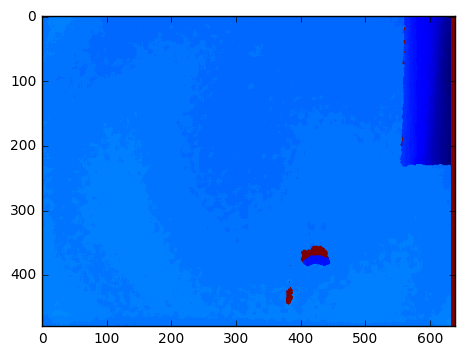

In [5]:
depth_uv_0 = next(images)
depth_uv = next(images)
plt.imshow(depth_uv_0)

In [6]:
v, u  = np.mgrid[:HEIGHT, :WIDTH]

In [7]:
xyz_0, uv_0 = depth2xyzuv(depth_uv_0, u, v)
xyz, _ = depth2xyzuv(depth_uv, u, v)

(480, 0)

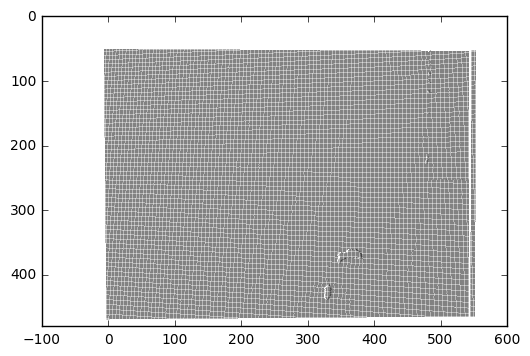

In [8]:
plt.plot(uv_0[:, 0], uv_0[:, 1], 'k.', alpha=1, markersize=0.1)
plt.ylim(480, 0)

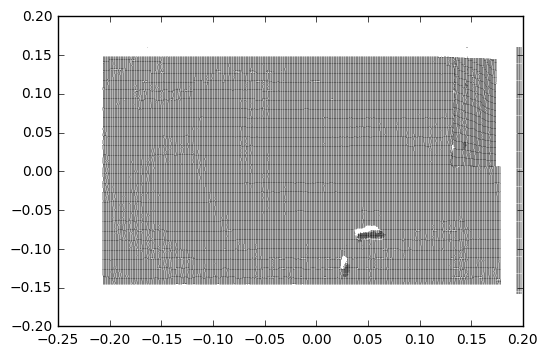

In [9]:
plt.plot(xyz[:,0], xyz[:,1], 'k.', markersize=0.1)

In [10]:
import scipy
xmin, xmax, ymin, ymax = (-0.15, 0.15, -0.15, 0.15)
X, Y = np.meshgrid(
        np.linspace(xmin, xmax, num=640),
        np.linspace(ymin, ymax, num=480)
    )

F = scipy.interpolate.NearestNDInterpolator(xyz_0[:,:2], xyz_0[:,2])
z_0 = F(X.ravel(), Y.ravel())
Z_0 = z_0.reshape(X.shape)

F = scipy.interpolate.NearestNDInterpolator(xyz[:,:2], xyz[:,2])
X, Y = np.meshgrid(
        np.linspace(xmin, xmax, num=640),
        np.linspace(ymin, ymax, num=480)
    )

z = F(X.ravel(), Y.ravel())
Z = z.reshape(X.shape)

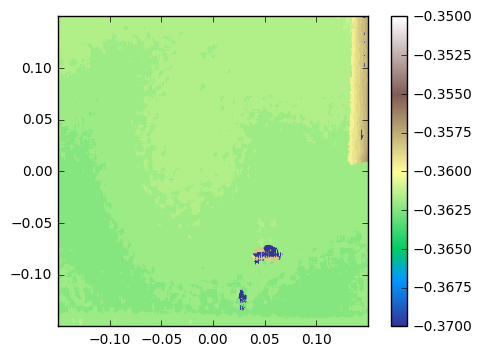

In [26]:
plt.imshow(Z, cmap='terrain', vmin=-0.37, vmax=-0.35, extent=(-0.15, 0.15, -0.15, 0.15), origin='bottom')
plt.colorbar()